In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

read from CSV file

In [2]:
df = pd.read_csv('project1.csv', index_col =0)

In [3]:
df.dtypes

status           object
los angeles       int64
phoenix           int64
san diego         int64
san francisco     int64
seattle           int64
dtype: object

In [4]:
df.head()

,status,los angeles,phoenix,san diego,san francisco,seattle
origin,,,,,,
Alaska,on time,497,221,212,503,1841
Alaska,delayed,62,12,20,102,305
AM west,on time,694,4840,383,320,201
AM west,delayed,117,415,65,129,61


split dataframe into two by index(airline), keep a copy for later use
AK =Alaska
AM =AM west

add column and calcuate the total count for each row.
add row for delay rate for every airport, delay/(on time+delay)*100

In [5]:
AK = df.loc['Alaska']
AK = AK.set_index('status')

AK_origin = AK.copy()

AK['total'] = AK.sum(axis=1)
AK.loc['Delay Rate(%)'] = ((AK.loc['delayed']/(AK.loc['on time']+AK.loc['delayed'])*100)
                              .apply('{:.2f}'.format))
AK

,los angeles,phoenix,san diego,san francisco,seattle,total
status,,,,,,
on time,497,221,212,503,1841,3274
delayed,62,12,20,102,305,501
Delay Rate(%),11.09,5.15,8.62,16.86,14.21,13.27


In [6]:
AM = df.loc['AM west']
AM = AM.set_index('status')

AM_origin = AM.copy()
AM['total'] = AM.sum(axis=1)
AM.loc['Delay Rate(%)'] = ((AM.loc['delayed']/(AM.loc['on time']+AM.loc['delayed'])*100)
                              .apply('{:.2f}'.format))
AM

,los angeles,phoenix,san diego,san francisco,seattle,total
status,,,,,,
on time,694,4840,383,320,201,6438
delayed,117,415,65,129,61,787
Delay Rate(%),14.43,7.90,14.51,28.73,23.28,10.89


extract delay rate row into series, using this row to analysis the data
datatype needs to convert.

In [7]:
AK_delay = AK.xs('Delay Rate(%)')
AM_delay = AM.xs('Delay Rate(%)')
AM_delay=AM_delay.astype(float)
AK_delay=AK_delay.astype(float)


First, compare the total delay rate, as graph displayed, Alaska has higher overall delay rate.

         Total Delay Rate
AM west             10.89
Alaska              13.27


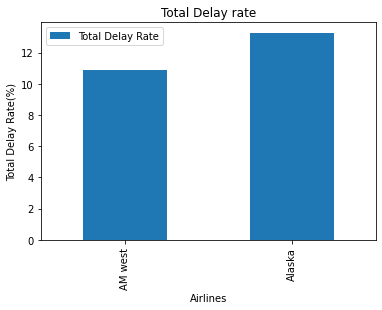

In [8]:
Total_delay =pd.DataFrame({'Total Delay Rate':{'Alaska':AK_delay.iloc[5],'AM west':AM_delay.iloc[5]}}) 
print(Total_delay)
Total_delay.plot(kind='bar')
plt.title('Total Delay rate')
plt.xlabel('Airlines')
plt.ylabel('Total Delay Rate(%)')
plt.show()

But if we dispaly all airports delay rate, all AM west delay rates are higher than Alaska

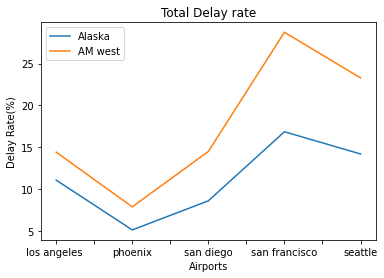

In [9]:
AK_delay.drop(labels=['total'],inplace = True )
AM_delay.drop(labels=['total'],inplace = True )
AK_delay.plot(label='Alaska')
AM_delay.plot(label= 'AM west')
plt.title('Total Delay rate')
plt.xlabel('Airports')
plt.ylabel('Delay Rate(%)')
plt.legend(loc='best')

plt.show()


By presenting the flight counts, noticed the number of flight for AM West in Phoenix is way higher than others, although the delay rate in Phoenix is still higher than Alaska, due to large data added to total counts, the overall delay rate get affected. 
Conclusion: AM West has higher delay rate than Alaska.

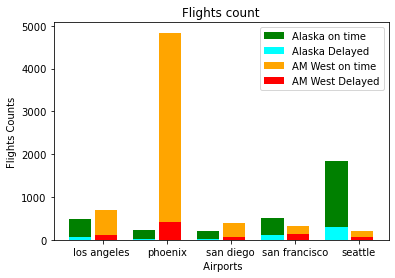

In [10]:
n=len(list(AK_origin))

ind = np.arange(n) + .15 # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, AK_origin.loc['on time'], width, color='g', label = 'Alaska on time') 
rects2 = ax.bar(ind, AK_origin.loc['delayed'], width, color='cyan', label = 'Alaska Delayed') 

xtra_space = 0.05
rects1 = ax.bar(ind + width + xtra_space , AM_origin.loc['on time'], width, color='orange', label = 'AM West on time') 
rects2 = ax.bar(ind + width + xtra_space, AM_origin.loc['delayed'], width, color='r',label = 'AM West Delayed') 

# add some text for labels, title and axes ticks
ax.set_ylabel('Flights Counts')
ax.set_xlabel(' Airports')

ax.set_title('Flights count')
ax.legend(loc='best')
ax.set_xticks(ind+width)
ax.set_xticklabels(list(AK_origin))

plt.show()